# gamma 开窗拟合beta 衰变寿命

In [1]:
TFile *ipf = new TFile("../MergedData/decay47_128.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1 = new TCanvas;

#### 将下图在一定能量范围向 x 轴投影，拟合指数衰减曲线

In [2]:
double xmax = 15.*150.;  // fit range: adjust by beta lifetime

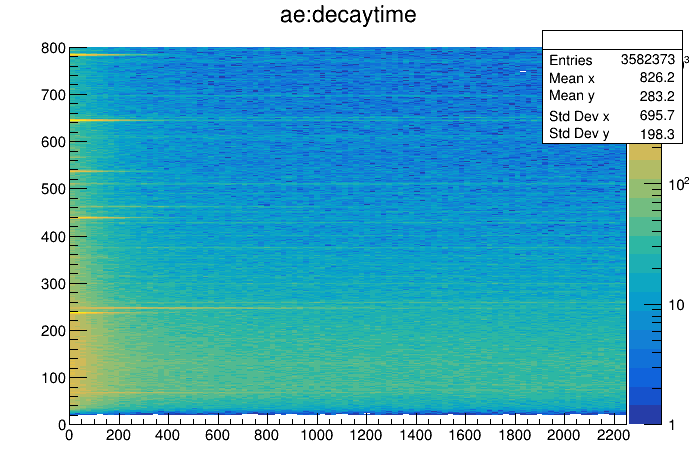

In [3]:
tree->Draw(Form("ae:decaytime>>(100,0,%f,800,0,800)",xmax),"","colz");
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

In [4]:
Int_t e,e1,e2;  // gate (e1,e2), name e
vector<int> b;  // background bin

In [5]:
void gate(int nbin) // nbin: decaytime's bin; xmax: fit range (0,xmax)
{
    tree->Draw(Form("decaytime>>h%d(%d,0,%f)",e,nbin,xmax),Form("ae>%d && ae<%d",e1,e2));
    TH1D *hdt = (TH1D*)gROOT->FindObject(Form("h%d",e));
    //hdt->Sumw2();
    TH1D *hbg = new TH1D("hbg","hbg",nbin,0,xmax);
    for (unsigned int i=0;i<b.size();i++){
        tree->Draw(Form("decaytime>>b%d(%d,0,%f)",b[i],nbin,xmax),Form("ae>%d && ae<%d",b[i],b[i]+1));
        TH1D *hbtemp = (TH1D*)gROOT->FindObject(Form("b%d",b[i]));
        hbg->Add(hbg,hbtemp,1,1);
    }
    double weight = (double)(e2-e1)/b.size();
    hdt->Add(hdt,hbg,1,-weight);
    TF1 *f1 = new TF1("f1","[0]^2+[1]*TMath::Exp(-x*TMath::Log(2)/[2])",10,xmax);  // parameter [2] is T1/2
    f1->SetParameter(0,0);
    f1->SetParameter(1,100);
    f1->SetParameter(2,50);
    hdt->Fit("f1","R");
    hdt->Draw();
    c1->Draw();
    delete hbg;
}

### 将上面二维谱向 y 轴投影，用来选取开窗和本底 bin

In [6]:
%jsroot on
tree->Draw("ae>>(3500,0,3500)",Form("decaytime<180"));
c1->SetLogy(0);
c1->Draw();

In [7]:
%jsroot off
c1->SetLogy();

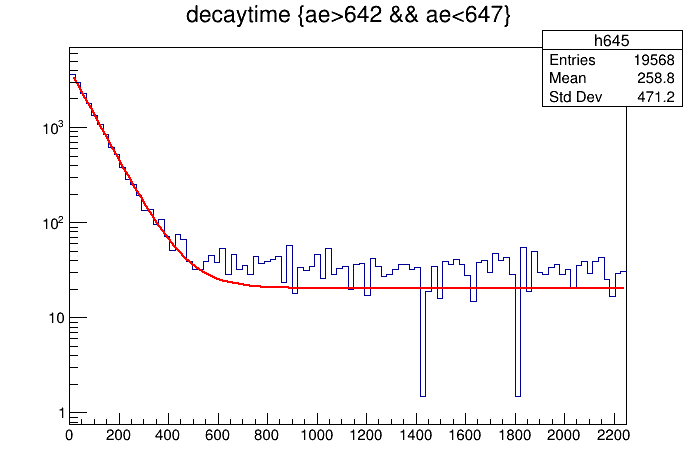

 FCN=992.477 FROM MIGRAD    STATUS=CONVERGED     170 CALLS         171 TOTAL
                     EDM=3.63178e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.51570e+00   5.71597e-02   8.63460e-04   2.25240e-04
   2  p1           4.17045e+03   4.85397e+01   5.05578e-01   6.61502e-07
   3  p2           6.20016e+01   5.60203e-01   5.76168e-03   2.61472e-05


In [8]:
e=645;
e1=642;
e2=647;
b.clear();
b.push_back(639);
b.push_back(640);
b.push_back(648);
b.push_back(649);
gate(100);

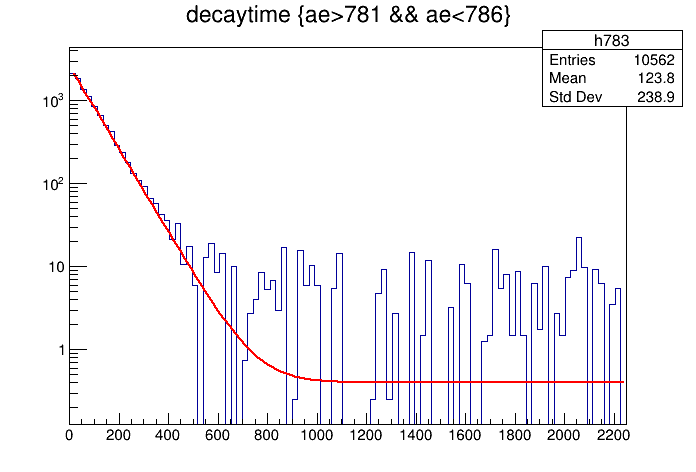

 FCN=555.598 FROM MIGRAD    STATUS=CONVERGED     202 CALLS         203 TOTAL
                     EDM=1.71762e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -6.31717e-01   1.25490e-01   5.44156e-05  -9.95506e-05
   2  p1           2.64574e+03   3.54991e+01   2.89173e-02  -7.99812e-07
   3  p2           6.00871e+01   5.52439e-01  -6.69115e-05  -1.87669e-05


In [9]:
e=783;
e1=781;
e2=786;
b.clear();
b.push_back(776);
b.push_back(777);
b.push_back(788);
b.push_back(789);
gate(100);

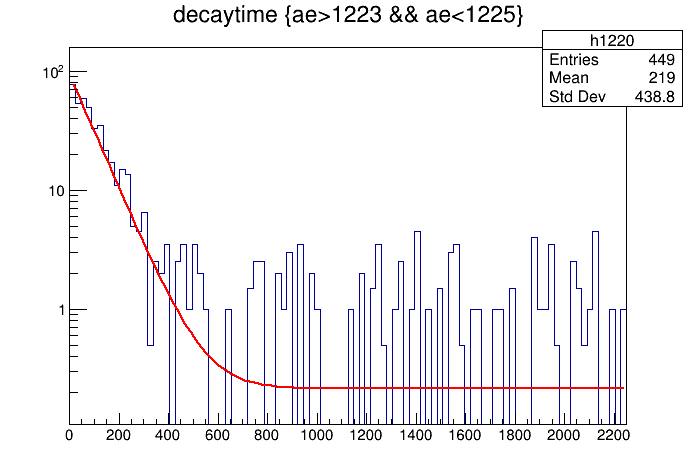

 FCN=160.589 FROM MIGRAD    STATUS=CONVERGED      87 CALLS          88 TOTAL
                     EDM=2.98605e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.62797e-01   1.37692e-01   8.21879e-04  -4.11446e-03
   2  p1           9.49624e+01   6.61497e+00   3.04579e-02   9.27471e-05
   3  p2           6.28677e+01   3.18265e+00   1.42548e-02   1.21820e-04


In [10]:
e=1220;
e1=1223;
e2=1225;
b.clear();
b.push_back(1210);
b.push_back(1211);
b.push_back(1230);
b.push_back(1231);
gate(100);

In [11]:
TF1 *f1 = new TF1("ff","[0]^2+[1]*TMath::Exp(-x*TMath::Log(2)/[2])",10,xmax);  // parameter [2] is T1/2
f1->SetParameter(0,0);
f1->SetParameter(1,100);
f1->SetParameter(2,50);

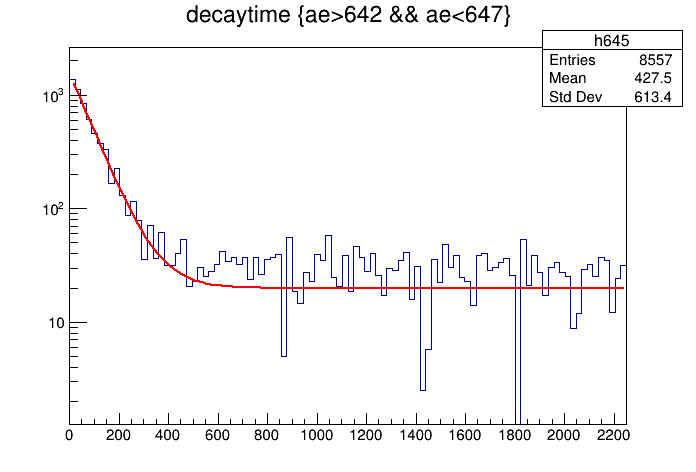

 FCN=873.452 FROM MIGRAD    STATUS=CONVERGED     232 CALLS         233 TOTAL
                     EDM=7.37724e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -4.45939e+00   5.65894e-02   7.96335e-04  -4.26441e-03
   2  p1           1.57671e+03   3.20824e+01   3.09068e-01   1.08777e-05
   3  p2           5.69659e+01   9.50666e-01   9.00273e-03   5.54221e-04


In [12]:
h645->Add(h783,-1);
h645->Add(h1220,-1);
h645->Fit("ff","R");
h645->Draw();
c1->Draw();